In [1]:
from LinerRegression.picCatTrainSet import load_data_fashion_mnist
import warnings

warnings.filterwarnings("ignore")
import paddle
from paddle import nn

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

In [2]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = paddle.randn([num_inputs, num_hiddens]) * 0.01
W1.stop_gradient = False
b1 = paddle.zeros([num_hiddens])
b1.stop_gradient = False
W2 = paddle.randn([num_hiddens, num_outputs]) * 0.01
W2.stop_gradient = False
b2 = paddle.zeros([num_outputs])
b2.stop_gradient = False

params = [W1, b1, W2, b2]

In [3]:
def relu(X):
    a = paddle.zeros_like(X)
    return paddle.maximum(X, a)

In [4]:
loss = nn.CrossEntropyLoss(reduction='none')

In [5]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

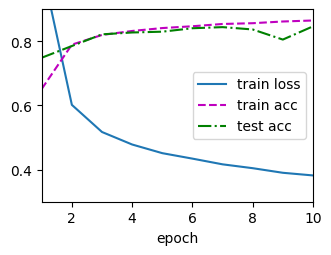

In [6]:
from LinerRegression.picCatTrainFromZeroUtils import train_ch3

num_epochs, lr = 10, 0.1
updater = paddle.optimizer.SGD(learning_rate=lr, parameters=params)
train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

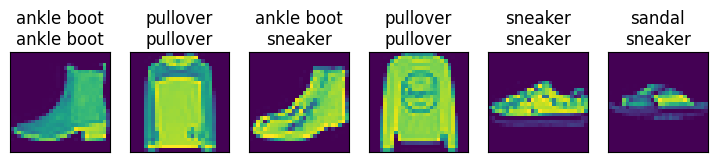

In [7]:
from utils import predict_ch3

predict_ch3(net, test_iter)